In [ ]:
!pip install opencv-python

In [56]:
import imutils
import cv2
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

In [50]:

img = cv2.imread("pool.jpg")
laplacian = cv2.Laplacian(img,cv2.CV_64F)

In [198]:
def show(img):
    plt.figure(figsize=(16,9))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


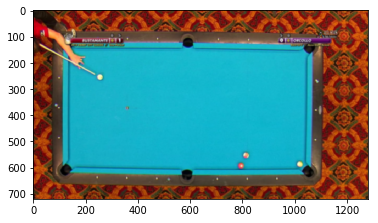

In [129]:
blurred = cv2.GaussianBlur(img, (11, 11), 2)
show(blurred)

array([ 88, 214, 167], dtype=uint8)

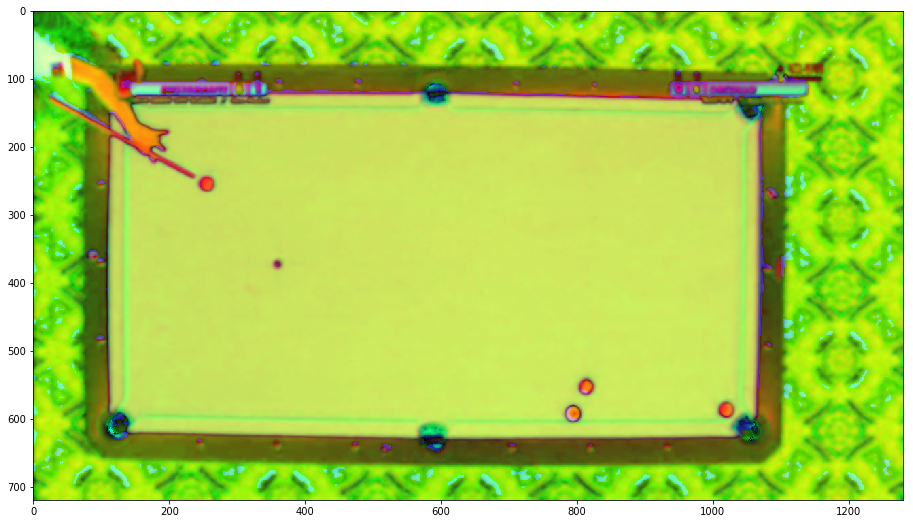

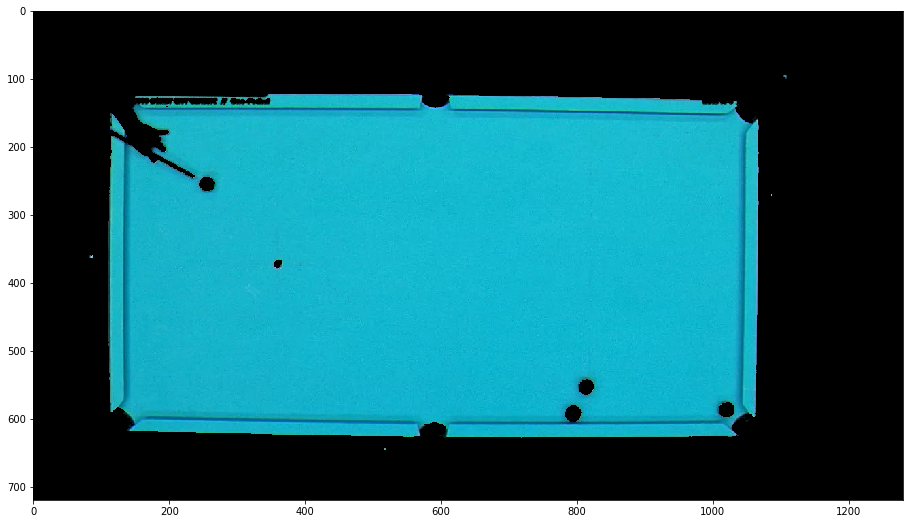

In [229]:
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
show(hsv)
frame = img
# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
lower_blue = np.array([80,80,20])
upper_blue = np.array([110,255,255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)
show(res)
hsv[600][400]

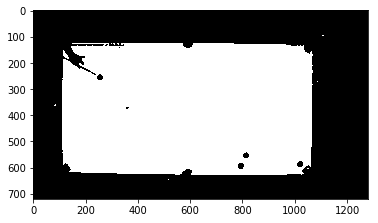

In [200]:
plt.imshow(mask, cmap="gray")

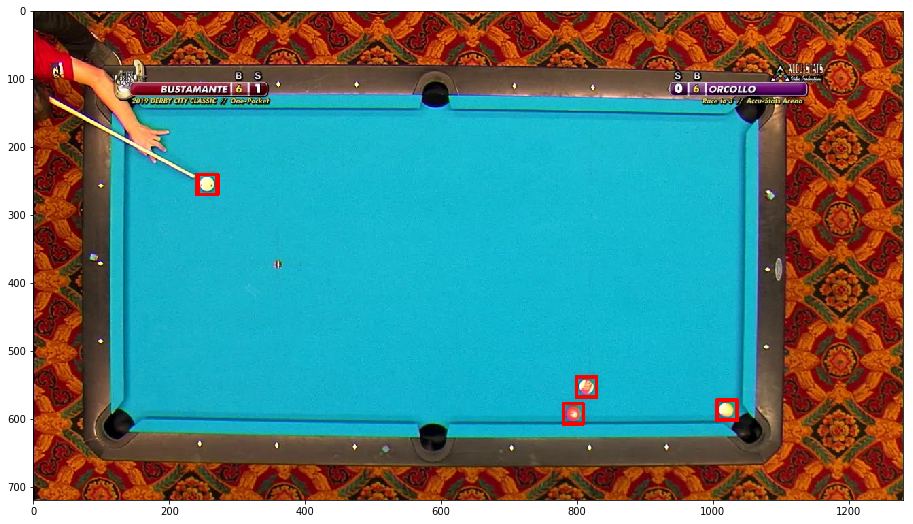

In [236]:
xx= mask
ball = cv2.resize(cv2.imread('Black_Circle.jpg',cv2.IMREAD_GRAYSCALE), (30,30))

img_gray = mask.copy() 
template = ball 
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img)
show(img)